<a href="https://colab.research.google.com/github/marcelcerri/biorreatores/blob/main/Resfriamento_de_corpos_de_newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resfriamento de corpos de Newton

A Lei do Resfriamento de Newton descreve como um corpo perde calor para o ambiente ao seu redor. Essa lei estabelece que a taxa de resfriamento de um objeto é proporcional à diferença de temperatura entre o objeto e o ambiente. Em outras palavras, quanto maior a diferença de temperatura, mais rápido o objeto esfria.

$\frac{dT}{dt} = -k (T - T_a)$

Onde:

$dT/dt$: Taxa de variação da temperatura do objeto em relação ao tempo.

T: Temperatura do objeto.

$T_a$: Temperatura ambiente (considerada constante).

k: Constante de proporcionalidade que depende das propriedades do objeto e do ambiente (área superficial, condutividade térmica, etc.).

A solução analítica do problema fica:

$T(t) = T_a + (T_0 - T_a) e^{-kt}$

T(t): Temperatura do objeto no tempo t.

$T_a$: Temperatura ambiente (considerada constante).

T0: Temperatura inicial do objeto.

k: Constante de proporcionalidade.


## Simulação

## Integração Númerica

A integração numérica é um método para aproximar o valor de uma integral definida quando não é possível (ou prático) encontrar uma solução analítica exata. Ela é especialmente útil quando a função a ser integrada é complexa, conhecida apenas por pontos discretos ou não possui uma antiderivada elementar.


### Método de Euler

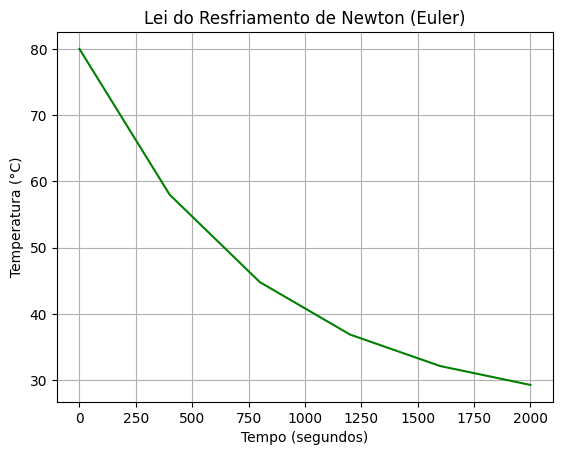

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a EDO (dT/dt = -k(T - Ta))
def resfriamento(T, t, k, Ta):
    return -k * (T - Ta)

# Parâmetros
k = 0.001  # Constante de resfriamento
Ta = 25 # Temperatura ambiente
T0 = 80  # Temperatura inicial
t0 = 0   # Tempo inicial
tf = 2000  # Tempo final
N = 5  # Número de passos

# Método de Euler
def euler(f, y0, t0, tf, N, *args):
    h = (tf - t0) / N
    te = np.linspace(t0, tf, N + 1)
    y = np.zeros(N + 1)
    y[0] = y0
    for i in range(N):
        y[i + 1] = y[i] + h * f(y[i], te[i], *args)
    return te, y

# Resolver a EDO com Euler
te, Te = euler(resfriamento, T0, t0, tf, N, k, Ta)

# Plotar a solução
plt.plot(te, Te, "g")
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.title('Lei do Resfriamento de Newton (Euler)')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()


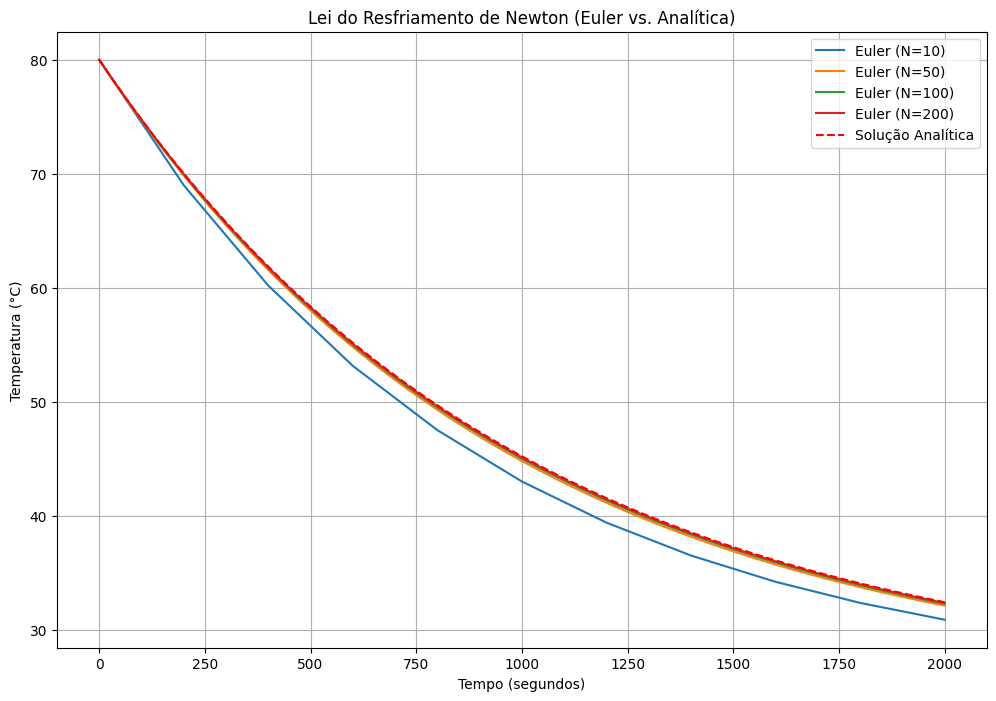

Erro médio absoluto (N=10): 1.674447
Erro médio absoluto (N=50): 0.328303
Erro médio absoluto (N=100): 0.163749
Erro médio absoluto (N=200): 0.081774


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import pandas as pd

# Definir a EDO (dT/dt = -k(T - Ta))
def resfriamento(T, t, k, Ta):
    return -k * (T - Ta)

# Definir a solução analítica
def solucao_analitica(t, T0, k, Ta):
    return Ta + (T0 - Ta) * np.exp(-k * t)

# Método de Euler
def euler(f, y0, t0, tf, N, *args):
    h = (tf - t0) / N
    te = np.linspace(t0, tf, N + 1)
    y = np.zeros(N + 1)
    y[0] = y0
    for i in range(N):
        y[i + 1] = y[i] + h * f(y[i], te[i], *args)
    return te, y

# Parâmetros
k = 0.001  # Constante de resfriamento
Ta = 25  # Temperatura ambiente
T0 = 80  # Temperatura inicial
t0 = 0  # Tempo inicial
tf = 2000  # Tempo final

# Testar diferentes valores de N
N_valores = [10, 50, 100, 200]
te_valores = []
Te_valores = []
erros = []

for N in N_valores:
    te, Te = euler(resfriamento, T0, t0, tf, N, k, Ta)
    Ta_analitica = solucao_analitica(te, T0, k, Ta)
    erro = np.mean(np.abs(Te - Ta_analitica))
    erros.append(erro)
    te_valores.append(te)
    Te_valores.append(Te)

# Plotar
plt.figure(figsize=(12, 8))  # Aumentar o tamanho da figura
for i, N in enumerate(N_valores):
    plt.plot(te_valores[i], Te_valores[i], label=f'Euler (N={N})')
plt.plot(te, Ta_analitica, 'r--', label='Solução Analítica')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Temperatura (°C)')
plt.title('Lei do Resfriamento de Newton (Euler vs. Analítica)')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir erros
for i, N in enumerate(N_valores):
    print(f'Erro médio absoluto (N={N}): {erros[i]:.6f}')

# Criar um DataFrame com os dados para o gráfico
df = []
for i, N in enumerate(N_valores):
    df.extend([{"Tempo": t, "Temperatura": temp, "Método": f"Euler (N={N})"} for t, temp in zip(te_valores[i], Te_valores[i])])
df.extend([{"Tempo": t, "Temperatura": temp, "Método": "Solução Analítica"} for t, temp in zip(te, Ta_analitica)])
df = pd.DataFrame(df)

# Criar o gráfico interativo com Altair
chart = alt.Chart(df).mark_line().encode(
    x='Tempo',
    y='Temperatura',
    color='Método',
    tooltip=['Tempo', 'Temperatura', 'Método']
).properties(
    title='Lei do Resfriamento de Newton (Euler vs. Analítica)'
).interactive()

chart.save('lei_resfriamento_newton_euler_analitica.json')



### Método de Runge-Kutta

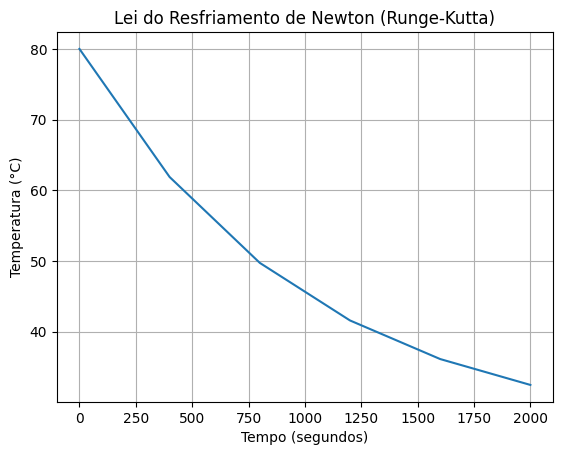

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a EDO (dT/dt = -k(T - Ta))
def resfriamento(T, t, k, Ta):
    return -k * (T - Ta)

# Parâmetros
k = 0.001  # Constante de resfriamento (1/segundo)
Ta = 25  # Temperatura ambiente (graus Celsius)
T0 = 80  # Temperatura inicial (graus Celsius)
t0 = 0   # Tempo inicial (segundos)
tf = 2000  # Tempo final (segundos)
N = 5  # Número de passos

# Runge-Kutta de quarta ordem
def runge_kutta(f, y0, t0, tf, N, *args):
    h = (tf - t0) / N
    tr = np.linspace(t0, tf, N + 1)
    y = np.zeros(N + 1)
    y[0] = y0
    for i in range(N):
        k1 = h * f(y[i], tr[i], *args)
        k2 = h * f(y[i] + 0.5 * k1, tr[i] + 0.5 * h, *args)
        k3 = h * f(y[i] + 0.5 * k2, tr[i] + 0.5 * h, *args)
        k4 = h * f(y[i] + k3, tr[i] + h, *args)
        y[i + 1] = y[i] + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return tr, y

# Resolver a EDO com Runge-Kutta
tr, Tr = runge_kutta(resfriamento, T0, t0, tf, N, k, Ta)

# Plotar a solução
plt.plot(tr, Tr)
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.title('Lei do Resfriamento de Newton (Runge-Kutta)')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()


Vamos comparar os métodos com a solução analítica

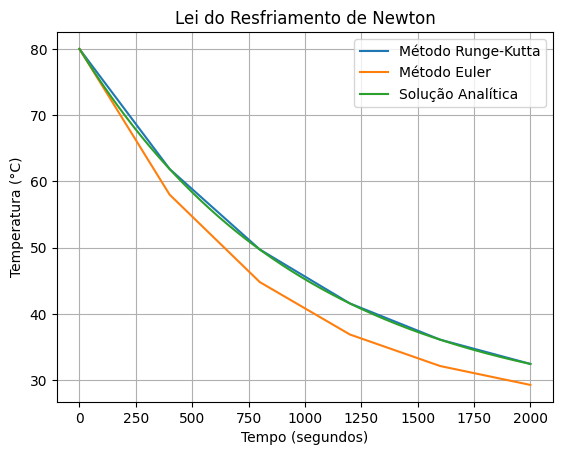

In [ ]:
#Solução Analítica
T0 = 80  # Temperatura inicial do corpo (°C)
Ta = 25  # Temperatura ambiente (°C)
k = 0.001  # Constante de resfriamento (1/segundo)

# Intervalo de tempo
t_an = np.linspace(0, 2000, 1000)  # criando o vetor tempo

T_an = Ta + (T0-Ta)*np.exp(-k*t_an)

plt.plot(tr, Tr, label="Método Runge-Kutta")
plt.plot(te, Te, label="Método Euler")
plt.plot(t_an, T_an, label="Solução Analítica")
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.title('Lei do Resfriamento de Newton')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend()
plt.show()



Vamos explorar a integração numérica em um contexto mais prático, focando em equações diferenciais ordinárias (EDOs) e utilizando a poderosa função odeint da biblioteca SciPy do Python.
A Função odeint:

A função odeint da biblioteca SciPy implementa diversos métodos de integração numérica para resolver EDOs. Ela é fácil de usar e oferece alta precisão e flexibilidade.

Como Usar odeint:

EDO: Crie uma função Python que recebe o estado atual do sistema (variáveis dependentes) e o tempo, e retorna as derivadas das variáveis.

Condições Iniciais: Crie um array NumPy com os valores iniciais das variáveis dependentes.

Intervalo de Tempo: Crie um array NumPy com os pontos de tempo em que você deseja calcular a solução.

Chamar odeint: Passe a função da EDO, as condições iniciais e o intervalo de tempo para a função odeint. Ela retornará um array NumPy com a solução da EDO em cada ponto de tempo.

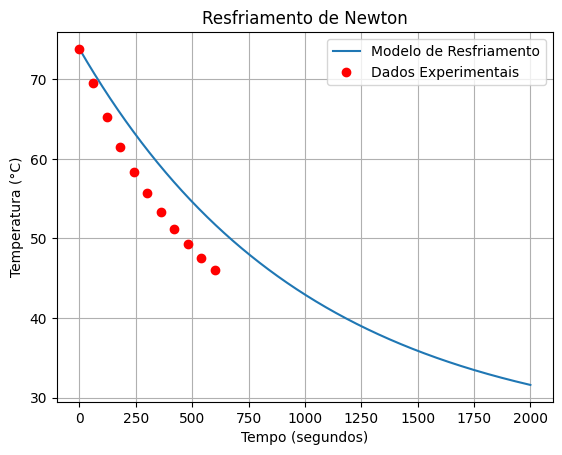

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution # função de algoritmo genético

# Apresentação da função odeint
# Apresentação da função differential evolution
# Apresentação do problema de resfriamento de corpos

def resfriamento_newton(T, t, Ta, k):
    """Modelo de resfriamento de Newton: dT/dt = -k(T - Ta)"""
    dTdt = -k * (T - Ta)
    return dTdt

# Parâmetros
T0 = 73.81  # Temperatura inicial do corpo (°C)
Ta = 25  # Temperatura ambiente (°C)
k_init = 0.001  # Constante de resfriamento (1/segundo)

# Intervalo de tempo
t = np.linspace(0, 2000, 1000)  # criando o vetor tempo

# Resolve a EDO
T = odeint(resfriamento_newton, T0, t, args=(Ta, k_init))

# Pontos experimentais
Tempo = [0,60,120,180,240,300,360,420,480,540,600]
Temperatura = [73.81,69.56,65.31,61.44,58.38,55.69,53.31,51.13,49.25,47.5,46.06]

# Plot modelo e pontos experimentais juntos
plt.plot(t, T, label='Modelo de Resfriamento')
plt.plot(Tempo, Temperatura, "or", label='Dados Experimentais')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Temperatura (°C)')
plt.title('Resfriamento de Newton')
plt.legend()
plt.grid(True)
plt.show()


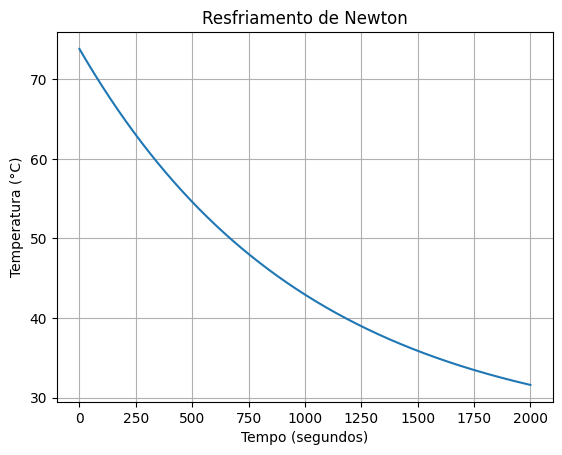

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


# Apresentação da função odeint
# Apresentação da função differential evolution
# Apresentação do problema de resfriamento de corpos

def resfriamento_newton(T, t, Ta, k):
    """Modelo de resfriamento de Newton: dT/dt = -k(T - Ta)"""
    dTdt = -k * (T - Ta)
    return dTdt

# Parâmetros
T0 = 73.81  # Temperatura inicial do corpo (°C)
Ta = 25  # Temperatura ambiente (°C)
k_init = 0.001  # Constante de resfriamento (1/segundo)

# Intervalo de tempo
t = np.linspace(0, 2000, 1000)  # criando o vetor tempo

# Resolve a EDO
T = odeint(resfriamento_newton, T0, t, args=(Ta, k_init))


# Plot modelo e pontos experimentais juntos
plt.plot(t, T, label='Modelo de Resfriamento')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Temperatura (°C)')
plt.title('Resfriamento de Newton')
plt.grid(True)
plt.show()


In [ ]:
help(resfriamento_newton)

Help on function resfriamento_newton in module __main__:

resfriamento_newton(T, t, Ta, k)
    Modelo de resfriamento de Newton: dT/dt = -k(T - Ta)
    Args:
        T: Temperatura do objeto no tempo t.
        t: Tempo.
        Ta: Temperatura ambiente (constante).
        k: Constante de resfriamento.
    
    Returns:
        dTdt: Taxa de variação da temperatura em relação ao tempo.



## Modelagem

A modelagem é o processo de representar um sistema ou fenômeno do mundo real de forma simplificada, utilizando equações, gráficos, diagramas ou outras ferramentas. O objetivo da modelagem é entender, prever ou controlar o comportamento do sistema em estudo.

###Algoritmos Genéticos

Algoritmos Genéticos (AGs) são uma classe de algoritmos de otimização inspirados no processo de evolução natural. Eles são utilizados para encontrar soluções para problemas complexos, onde a busca exaustiva de todas as possibilidades seria inviável.


####Funcionamento dos AGs:


População Inicial: Uma população de soluções candidatas é gerada aleatoriamente.
Avaliação: Cada solução é avaliada de acordo com uma função de aptidão, que mede sua qualidade.

Seleção: As melhores soluções são selecionadas para gerar a próxima geração.
Cruzamento: Novas soluções são criadas combinando partes das soluções selecionadas.

Mutação: Pequenas alterações aleatórias são introduzidas nas novas soluções para aumentar a diversidade.

Repetição: Os passos 2 a 5 são repetidos por várias gerações até que uma solução satisfatória seja encontrada ou um critério de parada seja atingido.


####Vantagens dos AGs:

Robustez: Capazes de lidar com problemas complexos e não lineares.

Flexibilidade: Podem ser adaptados a diferentes tipos de problemas.

Paralelismo: Podem ser facilmente paralelizados para aumentar a eficiência.


Vídeo bem didático sobre a ideia de algoritmo genético

https://www.youtube.com/watch?v=xtHMSJLnKsE


True
 message: Optimization terminated successfully.
 success: True
     fun: 3.7336942928159598
       x: [ 1.486e-03]
     nit: 12
    nfev: 13008
     jac: [ 8.182e+00]
Valor otimizado de k: 0.001486
R²: 0.9956
Resíduos:
3.7336942928159598
Valores obtidos pelo odeint:
[73.81       69.6463106  65.83779933 62.35416898 59.16770744 56.25306427
 53.58705156 51.14846042 48.91789101 46.87759818 45.01135108]


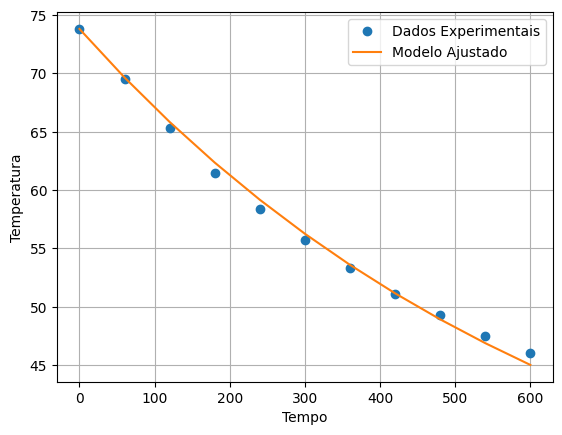

In [ ]:
from scipy.integrate import odeint
from scipy.optimize import differential_evolution
import numpy as np
import matplotlib.pyplot as plt
# --- BIBLIOTECAS ---

# NumPy para operações numéricas e arrays
# Matplotlib para plotar gráficos
# odeint para resolver a EDO
# differential_evolution para otimização com algoritmos genéticos

# --- DEFINIÇÕES DE FUNÇÕES ---

def resfriamento_newton(T, t, Ta, k):
    """
    Modelo de resfriamento de Newton: dT/dt = -k(T - Ta)
    Args:
        T: Temperatura do objeto no tempo t.
        t: Tempo.
        Ta: Temperatura ambiente (constante).
        k: Constante de resfriamento.

    Returns:
        dTdt: Taxa de variação da temperatura em relação ao tempo.
    """
    dTdt = -k * (T - Ta)
    return dTdt

def funcao_obj(k, Tempo, Temperatura, Ta):
  T0 = Temperatura[0]  # Temperatura inicial
  sim_T = odeint(resfriamento_newton, T0, Tempo, args=(Ta, k))
  res = sim_T.flatten() - Temperatura
  return np.sum(res**2)

# Dados experimentais

Tempo = np.array([0,60,120,180,240,300,360,420,480,540,600])
Temperatura = np.array([73.81,69.56,65.31,61.44,58.38,55.69,53.31,51.13,49.25,47.5,46.06])
Ta = 25 # Temperatura ambiente (fixa)

# Otimização
bounds = [(0, 0.1)] # Intervalo de busca para o k
args = (Tempo, Temperatura, Ta)  # Argumentos fixos para função objetiva

resultado = differential_evolution(
    funcao_obj, bounds, args=args,
    popsize=1000, maxiter=10000  # Experimente diferentes estratégias
)

# Resultados

k_otimo = resultado.x[0]
print(resultado.success)
print(resultado)
print(f'Valor otimizado de k: {k_otimo:.6f}')

# Visualização
T_sim = odeint(resfriamento_newton, Temperatura[0], Tempo, args=(Ta, k_otimo)).flatten()

# Cálculo do R²
SSR = np.sum((Temperatura - T_sim)**2)
SST = np.sum((Temperatura - np.mean(Temperatura))**2)
R2 = 1 - SSR / SST
print(f'R²: {R2:.4f}')

# Calculando e exibindo os resíduos
residuos = Temperatura - T_sim
print("Resíduos:")
print(np.sum(residuos**2))

# Exibindo os valores obtidos pelo odeint
print("Valores obtidos pelo odeint:")
print(T_sim)

# Vizualização
plt.plot(Tempo, Temperatura, 'o', label='Dados Experimentais')
plt.plot(Tempo, T_sim, label='Modelo Ajustado')
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.legend()
plt.grid()
plt.show()
